In [34]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Project leaders: Stéphane Sénési (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL)
##### Developers: Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL), Sylvana Ramos-Buarque (CNRM-GAME)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##### Contributors: you!
##   
##### contact: climaf@meteo.fr

The goals of CliMAF are to provide the scientists with simplified and science-oriented means for :
- accessing both model and references data
- pre-tretament (period and geographical selections, regridding, averaging like seasonal mean computations...)
- plotting  maps, cross-sections and time series
- building  atlases
- plugging personal scripts in an atlas or in an analysis workflow
- sharing such scripts
- handlling ensembles (multi-model, multi-realization)
CliMAF provides full managment of the outputs by handling the naming of the output files; it also stores the information on "how I obtained this file" under the form of an expression called CRS (CliMAF Reference Syntax) that allows checking for the existing files and avoid recomputing the same files twice (or more).

#  
#   

# Gathering my results in an html page

Gathering your figures in an html page is very convenient to both:
- store your results and visualize them
- share them with collaborators

We will see in this notebook how we can:
- 1. make a portable atlas = html file + figures together in a single directory => can be read on your local machine or from Jupyter
- 2. use /prodigfs/ipslfs/dods to store your atlas and share only the url with your collaborators
- 3. And a little bonus to see how to execute the plots in parallel

### Find the documentation on CliMAF html toolbox here: https://climaf.readthedocs.io/en/master/functions_results_viewing.html?highlight=climaf.html#html-package-for-creating-an-html-index-with-tables-of-links-to-figures

#  

## First, import climaf

In [1]:
from climaf.api import *

('LC debug :', False)
CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_gr_V1.2.13
python => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncl


CliMAF version = 1.2.13


cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncdump
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


### And set verbosity ('critical' -> minimum ; 'debug' -> maximum)

In [2]:
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

### ... and dont' forget to open the documentation in case you have questions.
### http://climaf.readthedocs.org/
### -> Use the "Quick search" space to search for what you are interested in, it is really powerfull!
###  

## Preliminary: we get a CMIP5 multi-model ensemble as an illustration

In [3]:
# -- We use ds() to get the dataset
req_cmip5 = ds(project='CMIP5',
               model='*',
               variable='tos',
               experiment='historical',
               period='1980',
               frequency='monthly',
               version='latest'
               )
req_cmip5.explore('choices')

{'model': ['ACCESS1-0',
  'ACCESS1-3',
  'BNU-ESM',
  'CCSM4',
  'CESM1-BGC',
  'CESM1-CAM5',
  'CESM1-CAM5-1-FV2',
  'CESM1-FASTCHEM',
  'CESM1-WACCM',
  'CMCC-CESM',
  'CMCC-CM',
  'CMCC-CMS',
  'CNRM-CM5',
  'CNRM-CM5-2',
  'CSIRO-Mk3-6-0',
  'CanCM4',
  'CanESM2',
  'EC-EARTH',
  'FGOALS-g2',
  'FGOALS-s2',
  'GFDL-CM2p1',
  'GFDL-CM3',
  'GFDL-ESM2G',
  'GFDL-ESM2M',
  'GISS-E2-H',
  'GISS-E2-H-CC',
  'GISS-E2-R',
  'GISS-E2-R-CC',
  'HadCM3',
  'HadGEM2-AO',
  'HadGEM2-CC',
  'HadGEM2-ES',
  'IPSL-CM5A-LR',
  'IPSL-CM5A-MR',
  'IPSL-CM5B-LR',
  'MIROC-ESM',
  'MIROC-ESM-CHEM',
  'MIROC5',
  'MPI-ESM-LR',
  'MPI-ESM-MR',
  'MPI-ESM-P',
  'MRI-CGCM3',
  'MRI-ESM1',
  'NorESM1-M',
  'NorESM1-ME',
  'bcc-csm1-1',
  'bcc-csm1-1-m',
  'inmcm4'],
 'realm': 'ocean',
 'table': 'Omon'}

In [6]:
ens_cmip5 = req_cmip5.explore('ensemble')

summary(ens_cmip5)

Keys - values:
{'domain': 'global', 'realm': 'ocean', 'version': 'latest', 'period': 1980, 'simulation': '', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tos', 'table': 'Omon', 'model': 'ACCESS1-0', 'root': '/prodigfs/project'}
-- Ensemble members:
ACCESS1-0
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
--
ACCESS1-3
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
--
CESM1-CAM5-1-FV2
/prodigfs/project/CMIP5/output/NSF-DOE-NCAR/CESM1-CAM5-1-FV2/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CESM1-CAM5-1-FV2_historical_r1i1p1_185001-200512.nc
--
IPSL-CM5B-LR
/prodigfs/project/CMIP5/output/IPSL/IPSL-CM5B-LR/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_IPSL-CM5B-LR_historical_r1i1p1_185001-200512.nc
--
GFDL-ESM2M

### Compute a climatology, regrid on a regular grid and select the North Atlantic region

In [9]:
# -- Climatology
clim_ens_cmip5 = clim_average(ens_cmip5, 'ANM')

# -- Regridding
rgrd_clim_ens_cmip5 = regridn(clim_ens_cmip5, cdogrid='r360x180')

# -- Select the region
NATL_cmip5 = llbox(rgrd_clim_ens_cmip5, lonmin=-90, lonmax=20, latmin=0, latmax=90)

#### Quick check:

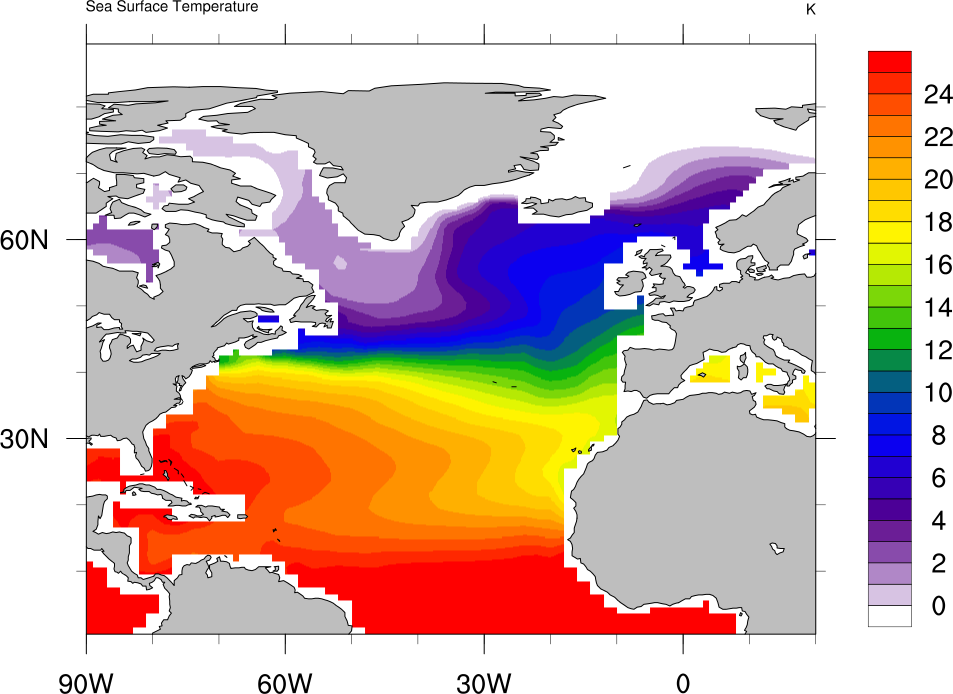

In [50]:
#implot(NATL_cmip5['IPSL-CM5A-LR'], focus='ocean', color='WhViBlGrYeOrRe', offset=-273.15,
#       min=0, max=25, delta=1
#        )
pp = dict(focus='ocean', color='WhViBlGrYeOrRe', offset=-273.15,
          min=0, max=25, delta=1)
implot(NATL_cmip5['IPSL-CM5A-LR'], **pp)

### Ok, we have our ensemble ready.
#  
### Let's start the html page.

## 1. Make a portable atlas in your current directory
https://climaf.readthedocs.io/en/master/functions_results_viewing.html?highlight=climaf.html#html-package-for-creating-an-html-index-with-tables-of-links-to-figures

In [51]:
# -- Pour construire une page html:
from climaf.html import *
from climaf.cache import cachedirs
import os

# -- Directory where we create the atlas => need to be on same files
subdir = 'demo_atlas'
outdir = cachedirs[0]+'/'+subdir
index_name = 'atlas.html'

# -- Addresses a utiliser pour voir le repertoire depuis la page web
#alt_dir_name = "/thredds/fileServer/IPSLFS"+str.split(outdir,'dods')[1]
#root_url = "https://vesg.ipsl.upmc.fr"

atlas_head_title = 'Demo html atlas in CliMAF'
style_file = cpath[0]+'/cesmep_style_css'
thumbnail_size = '400*250'

if not os.path.isdir(outdir):
    os.makedirs(outdir)
else:
    os.system('rm -f '+outdir+'/*.png')

In [66]:
# -----------------------------------------------------------------------------------
# - Init html index
# -----------------------------------------------------------------------------------
index = header(atlas_head_title, style_file=style_file)

# -- Start a section
index += section('Title of the section', level=4)
index += start_line('And a title for your line of plots')

# -- On va faire les plots de tous les modeles
# -> pp = dictionaire de parametres de plot a prendre depuis la page de doc CliMAF sur plot: https://climaf.readthedocs.io/en/latest/scripts/plot.html
pp = dict(focus='ocean', color='WhViBlGrYeOrRe', offset=-273.15,
          min=0, max=25, delta=1)

safe_mode=True
for model in NATL_cmip5.order:
    print model
    my_plot = plot(NATL_cmip5[model], title=model, **pp)
    index += cell("", safe_mode_cfile_plot(my_plot, safe_mode=safe_mode),
                  thumbnail=thumbnail_size, hover=False, dirname=outdir)
    # safe_mode_cfile_plot execute le plot; si il rencontre une erreur, il ne s'arrete pas et renvoie
    # simplement une image blanche

# -- Close the section
index += close_line() + close_table()


# -- Add compare companion -> image selector (P. Brockmann)
# ----------------------------------------------------------------------------------------------
index += compareCompanion()

# -- End the index
index += trailer()

ACCESS1-0
--> Successfully plotted  plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%ACCESS1-0%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='ACCESS1-0')
ACCESS1-3
--> Successfully plotted  plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%ACCESS1-3%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='ACCESS1-3')
CESM1-CAM5-1-FV2
--> Successfully plotted  plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CESM1-CAM5-1-FV2%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='CESM1-CAM5-1-FV2')
IPSL-CM5B-

EC-EARTH
--> Successfully plotted  plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%EC-EARTH%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='EC-EARTH')
CanCM4
--> Successfully plotted  plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CanCM4%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='CanCM4')
CCSM4
--> Successfully plotted  plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CCSM4%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='CCSM4')
NorESM1-M
--> Successfully plotted  plot(llbox(regridn(

In [67]:
# -- Finalize and save atlas
# ----------------------------------------------------------------------------------------------
outfile = outdir+'/'+index_name
with open(outfile,"w") as filout : filout.write(index)

os.system('cp -r '+outdir+' '+os.getcwd())
print("index written as : "+outfile)
tmp = str.split(outdir,'/')
print "Available in current directory in: ", tmp[-1]


index written as : /data/jservon/climafcache/demo_atlas/atlas.html
Available in current directory in:  demo_atlas


## 2. Use /prodigfs/ipslfs/dods to store your atlas and share only the url with your collaborators
### We build on the example above.
### The second block is exactly the same.
### We just point to differences with the code above.

In [78]:
# -- Dods directory (web server)
dodsdir = '/prodigfs/ipslfs/dods/jservon'

# -- Url to use to access the page from the web
alt_dir_name = "/thredds/fileServer/IPSLFS"+str.split(dodsdir,'dods')[1]+'/'+subdir
root_url = "https://vesg.ipsl.upmc.fr"

In [80]:
# -- Copy on dods... 
# ----------------------------------------------------------------------------------------------
os.system('cp -r '+outdir+' '+dodsdir)
print("index copied in : "+dodsdir+'/'+subdir)

# -- and return the url of the atlas
# ----------------------------------------------------------------------------------------------
print("Available at this address "+root_url+outfile.replace(outdir,alt_dir_name))

index copied in : /prodigfs/ipslfs/dods/jservon/demo_atlas
Available at this address https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/demo_atlas/atlas.html


## 3. Execute a list of CliMAF objects in parallel
### Really interesting for heavy treatments, not so much for light ones (more effective in sequential execution)
In this example, we extracted from the atlas code above only the lines that lead to the plots (not the build of the html page).

- The principle is that we gather the CRS of all the CliMAF objects (here plots) in a list, and we provide this list to joblib.Parallel that will execute the function provided to joblib.delayed on the elements of the list in parallel. Find the documentation on joblib here: https://joblib.readthedocs.io/en/latest/ and an easy start here: https://blog.dominodatalab.com/simple-parallelization/

- Once all the plots have been executed and stored in the cache, we need to synchronize the cache.

- You can then run the code of the atlas (with the building of the html page) and benefit from the cache to just pick the existing results from it.

### !! Need to specify a number of cpus when submitting your interactive session at CLIMERI before running jupyter

In [77]:
from joblib import Parallel, delayed
import multiprocessing

clog('debug')

# -- We store all the CRS of all the plots in the list plots_crs
plots_crs = []
for model in NATL_cmip5.order:
    plots_crs.append( plot(NATL_cmip5[model], title=model, **pp) )

# -- Get the number of available cpus
num_cores = multiprocessing.cpu_count()

# -- Execute the plots in parallel
r = Parallel(n_jobs=num_cores)(delayed(safe_mode_cfile_plot)(climaf_crs) for climaf_crs in plots_crs)

# -- Synchronize the cache
csync(True)

# --> Now the plots are stored in the cache; simply re-run the code of your atlas
#     to assemble the html page with the pre-computed plots

info     : Listing crs from files present in cache
info     : Rebuilding cache index from file content
debug    : CRS expression read in /data/jservon/climafcache/f4854/7a7bd/24ccf/42df5/46ada/69d6e/a42cd/e2924/d2926/8e682/7ef08/a.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%IPSL-CM5A-MR%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,offset=-273.15,options='gsnAddCyclic=True',title='IPSL-CM5A-MR')
debug    : CRS expression read in /data/jservon/climafcache/ad326/88f4b/b66fc/d539d/76211/8373b/c7421/58883/232a4/775a3/867c2/7.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%ACCESS1-3%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/4dc62/04fc3/ac62c/d4e54/6268b/c9cae/aecbd/2cd5e/74374/c40cd/9cb1a/e.nc is ccdo(ds('CMIP5%r1i1p1%tos%1980

debug    : CRS expression read in /data/jservon/climafcache/da387/2c0fa/777b3/aec30/bcdc6/b336f/7ba15/a063d/0d71a/2de67/77b65/b.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CMCC-CMS%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/56436/892b3/e666b/2b528/94ddd/18b4c/2b4cf/5ccee/a5b69/251db/60b09/7.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CanCM4%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,offset=-273.15,options='gsnAddCyclic=True',title='CanCM4')
debug    : CRS expression read in /data/jservon/climafcache/b55d5/75536/bf0a5/21f58/8379d/66aca/c7e37/d3f88/4e681/df0b1/74a87/e.nc is regridn(time_average(ds('CMIP5%r1i1p1%tos%1980-2000%global%/prodigfs/project%CNRM-CM5%*%historical%r1i1p1%monthly%*%*')),cdogrid='r360x180',option

debug    : CRS expression read in /data/jservon/climafcache/b3809/4d76f/1c6a0/d3129/b1db4/93efc/8e6d8/ce4a8/5fb21/70bb9/2b5c0/e.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%EC-EARTH%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/6ac60/1b511/f4e8f/39358/6c8d0/9b33a/17b81/ff1e6/642d2/ca484/c3385/5.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%GFDL-CM3%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/aa9c8/da53f/0c0ab/37402/d735e/90c56/129f4/dbaa5/7a5f0/1210f/568c2/d.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%FGOALS-s2%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='FGOALS-s2')
debug    : CRS expression 

debug    : CRS expression read in /data/jservon/climafcache/acba4/b01ae/55472/662e4/b50b5/94123/1c869/0c1e5/a309c/d6575/c79a0/a.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%IPSL-CM5A-LR%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,mpCenterLonF='200',options='gsnAddCyclic=True',title='IPSL-CM5A-LR')
debug    : CRS expression read in /data/jservon/climafcache/7fb68/117d2/42f1e/1a313/22635/51195/aee09/d94fc/f1854/18192/e391b/5.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%bcc-csm1-1%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/421bc/645a8/3b88c/46d52/60538/7b5c1/fb335/e9bb1/b0a6f/731aa/928d7/6.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CESM1-BGC%Omon%historical%r1i1p1%monthly%ocean%lat

debug    : CRS expression read in /data/jservon/climafcache/36e17/3eae4/11402/6b6a2/57ddd/405bd/1e04d/427b6/ae63b/05a14/ad7f3/f.nc is select(ds('CMIP5%%tas%1980-2000%global%/prodigfs/project%CMCC-CESM%*%historical%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/f0fb0/53c8f/e73f3/bc637/e918e/5b94e/b4d0e/67a58/5fe44/41f48/afc6b/9.nc is select(ds('CMIP5%%tas%2040-2060%global%/prodigfs/project%NorESM1-M%*%rcp85%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/fbb94/b0eed/8e0be/cd994/6f507/41dfd/cbeaf/10702/85ee0/462de/d9f0a/b.nc is select(ds('CMIP5%%tas%2040-2060%global%/prodigfs/project%MPI-ESM-LR%*%rcp85%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/112e9/a6aee/f6de6/0f66b/d6ee0/d2d7e/70548/21c16/d5d51/8d836/b4ae7/3.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CMCC-CM%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')

debug    : CRS expression read in /data/jservon/climafcache/0a680/0abb4/fec17/41cf3/80e93/c5f8a/840bb/1d5bb/81cfb/71533/8c3c6/c.nc is time_average(ds('CMIP5%r1i1p1%tos%1980-2000%global%/prodigfs/project%CNRM-CM5%*%historical%r1i1p1%monthly%*%*'))
debug    : CRS expression read in /data/jservon/climafcache/5e061/5628a/5f673/92ef9/2dbe0/b2aa9/bdcae/61cfa/473a2/c1138/b5705/0.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CMCC-CM%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90)
debug    : CRS expression read in /data/jservon/climafcache/a5d9e/23fd9/e3e25/0ad4f/13f86/d6055/e6116/ae05a/0fb1f/95beb/94612/5.nc is select(ds('CMIP5%%tas%2040-2060%global%/prodigfs/project%MIROC-ESM-CHEM%*%rcp85%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/669a0/8079b/fc2cc/85e9c/dc887/4df8d/18950/8f595/8329f/e4d85/474a5/c.nc is time_average(ds('CMIP5%%tos%1980%global%/prodigfs/projec

debug    : CRS expression read in /data/jservon/climafcache/b66eb/dee32/73073/4e5f3/a723a/7e738/f4c64/1e365/dbd93/f0b6d/c38dd/b.nc is select(ds('CMIP5%%tas%1980-2000%global%/prodigfs/project%CCSM4%*%historical%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/e73d9/81c78/dc7b4/5764f/14b08/8b0c5/17c9c/3baa8/fe6c8/ffa3d/01771/d.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CMCC-CMS%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,mpCenterLonF='200',options='gsnAddCyclic=True',title='CMCC-CMS')
debug    : CRS expression read in /data/jservon/climafcache/8a7cf/97c60/b741d/d8169/41da8/03dd8/d4153/7befd/11416/cd10f/e486a/b.nc is select(ds('CMIP5%%tas%2040-2060%global%/prodigfs/project%ACCESS1-0%*%rcp85%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/df2cc/35091/677

debug    : CRS expression read in /data/jservon/climafcache/4536e/8d2a2/3224b/d3ce0/66421/6b24d/3eca4/af60c/9e7e1/4f26d/c7407/e.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%NorESM1-ME%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/96663/72d0c/537f8/28c4c/59702/df60e/3fe5a/e268d/29880/aeb99/11043/9.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CanCM4%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='CanCM4')
debug    : CRS expression read in /data/jservon/climafcache/f299f/39347/7a910/a5622/2149b/6e244/0a21d/3aa9b/64c0c/7d025/3c0ad/2.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CESM1-CAM5-1-FV2%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,

debug    : CRS expression read in /data/jservon/climafcache/c6656/9283f/18101/d6cb5/61be7/b23a7/a9f9e/40446/3026b/41f37/51526/9.nc is select(ds('CMIP5%%tas%2040-2060%global%/prodigfs/project%MRI-ESM1%*%rcp85%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/96424/eb108/04fb0/a08de/bd8ae/a5690/525e1/17f08/8150f/308f8/5cf82/a.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%GFDL-CM2p1%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90)
debug    : CRS expression read in /data/jservon/climafcache/df2f4/ad922/80889/6aa97/88263/1db8f/56556/d8cb3/3dcdd/1283b/afb76/7.nc is regrid(time_average(ds('CMIP5%r1i1p1%tos%1980-2000%global%/prodigfs/project%CNRM-CM5%*%historical%r1i1p1%monthly%*%*')),ds('ref_climatos%refproduct%tos%fx%global%annual_cycle%WOA13-v2%195501-201212%Omon%observations'))
debug    : CRS expression read in /data/jservon/climafcache/b6643/744db/7be11/778ac/604

debug    : CRS expression read in /data/jservon/climafcache/demo_atlas/climaf_atlas4983868719.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MIROC-ESM%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='MIROC-ESM')
debug    : CRS expression read in /data/jservon/climafcache/demo_atlas/climaf_atlas2321579919.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MPI-ESM-LR%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='MPI-ESM-LR')
debug    : CRS expression read in /data/jservon/climafcache/demo_atlas/climaf_atlas2631318715.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%IPSL-CM5B-LR%Omon%historical%r1i1p1%monthly%

debug    : CRS expression read in /data/jservon/climafcache/demo_atlas/climaf_atlas4074154119.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%bcc-csm1-1%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='bcc-csm1-1')
debug    : CRS expression read in /data/jservon/climafcache/demo_atlas/climaf_atlas8766525512.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MRI-ESM1%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=25,min=0,offset=-273.15,title='MRI-ESM1')
debug    : CRS expression read in /data/jservon/climafcache/demo_atlas/climaf_atlas3896684373.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%GFDL-ESM2G%Omon%historical%r1i1p1%monthly%ocea

debug    : CRS expression read in /data/jservon/climafcache/d4133/8072c/aab14/091b5/4edd6/11dcb/ec5a6/aee13/8c771/7f001/ff87c/8.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%EC-EARTH%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,mpCenterLonF='200',options='gsnAddCyclic=True',title='EC-EARTH')
debug    : CRS expression read in /data/jservon/climafcache/4d8c6/4ef34/baa00/3431c/e30b7/9edf8/cb70b/38d00/175b4/c22f5/18885/c.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MIROC-ESM-CHEM%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,offset=-273.15,options='gsnAddCyclic=True',title='MIROC-ESM-CHEM')
debug    : CRS expression read in /data/jservon/climafcache/92058/b7301/0b3ea/bda06/f2a5

debug    : CRS expression read in /data/jservon/climafcache/3bd65/cfb8e/27445/a7816/27f6b/98f44/644f3/936f8/99d28/a3d43/70ab7/6.nc is select(ds('CMIP5%%tas%1980-2000%global%/prodigfs/project%GFDL-CM3%*%historical%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/cb0eb/15e37/97b87/25c7c/27247/08610/0ebc3/1c7e3/44cdc/8d776/b92e4/4.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MPI-ESM-LR%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90)
debug    : CRS expression read in /data/jservon/climafcache/e10f9/b51b0/0112e/b1cd3/ff829/c40e8/a0733/a7f78/a0b3b/6e123/bcca6/a.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%IPSL-CM5A-LR%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,offset=-273.15,options='gsnAddCyclic=True',t

debug    : CRS expression read in /data/jservon/climafcache/b8040/13dbf/d0ff6/f7463/17c5f/b9cd7/cba49/4f6e6/9bb6c/f4193/abfb8/3.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%NorESM1-M%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/d4073/3b52c/84c9a/dda89/83658/aaf6f/29358/2c1d0/9ee62/03703/0dc74/d.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%NorESM1-M%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90)
debug    : CRS expression read in /data/jservon/climafcache/d6638/e64fb/7845e/2a718/a72ce/57c6d/666a6/8afed/e20f1/3a3b9/cb7c3/8.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%GISS-E2-R-CC%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/0d840/dd4bb/abc22/8a445/8f273/5a40e/269ae/93422/ff7a2/09ac2

debug    : CRS expression read in /data/jservon/climafcache/98494/24a22/b0e75/7151e/1bfff/81e0f/ecbf5/96501/b254e/732b9/8b328/5.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CESM1-WACCM%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90)
debug    : CRS expression read in /data/jservon/climafcache/0ac80/37572/59119/5cd29/06bb8/6a82b/99bf2/2fb67/2f3e3/92ee3/f5388/9.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CESM1-WACCM%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,mpCenterLonF='200',options='gsnAddCyclic=True',title='CESM1-WACCM')
debug    : CRS expression read in /data/jservon/climafcache/09da1/5e8a8/1686c/d7623/27368/df0f5/f3e2f/96bd4/31e87/890b8/efafe/1.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MRI-CGCM3%

debug    : CRS expression read in /data/jservon/climafcache/21df7/67ca4/83cfb/8f130/ce7e9/c960c/ea81c/62cb1/1e235/63c42/e59f5/0.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%GISS-E2-R-CC%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90)
debug    : CRS expression read in /data/jservon/climafcache/9a34d/68166/f353e/02a01/12321/2e313/20ec8/0b4f1/97f64/fb791/2ac98/7.nc is regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MPI-ESM-P%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180')
debug    : CRS expression read in /data/jservon/climafcache/2ac94/ad782/d2c7d/ef1de/ef24f/baf92/96dfd/d09dc/a161c/cd1cf/e039c/f.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%MPI-ESM-LR%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,mpCente

debug    : CRS expression read in /data/jservon/climafcache/cd661/684fe/aec88/b7697/0c8e9/669c7/d54f4/d1140/dd25c/6cc30/c854b/b.nc is select(ds('CMIP5%%tas%1980-2000%global%/prodigfs/project%bcc-csm1-1%*%historical%r1i1p1%monthly%*%latest'))
debug    : CRS expression read in /data/jservon/climafcache/067f5/fecae/9cb07/7a6a9/22103/11346/6190f/07fbf/1483d/c96ee/08362/5.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%bcc-csm1-1-m%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,mpCenterLonF='200',options='gsnAddCyclic=True',title='bcc-csm1-1-m')
debug    : CRS expression read in /data/jservon/climafcache/d0508/6d811/2c315/657ef/6d536/f6a0d/091db/6afcc/4dfcd/dd733/a1e52/0.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%bcc-csm1-1%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latm

debug    : CRS expression read in /data/jservon/climafcache/36dd9/a3b65/a99a5/b2db6/71dbb/0dde9/281af/e52c9/0654b/1ccd2/864f6/2.nc is llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%EC-EARTH%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90)
debug    : CRS expression read in /data/jservon/climafcache/f47de/c2e6c/580f6/e5e37/7e03c/909af/8f4f8/87f39/824f9/3b3fc/163b2/c.png is plot(llbox(regridn(time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%GFDL-ESM2G%Omon%historical%r1i1p1%monthly%ocean%latest')),cdogrid='r360x180'),latmax=90,latmin=0,lonmax=20,lonmin=-90),color='WhViBlGrYeOrRe',delta=1,focus='ocean',max=35,min=0,offset=-273.15,options='gsnAddCyclic=True',title='GFDL-ESM2G')
debug    : CRS expression read in /data/jservon/climafcache/a9b2d/12e66/08f76/a5d62/40bca/655cb/b2ba7/3ed87/a10b2/e4ea8/07f5a/3.nc is time_average(ds('CMIP5%%tos%1980%global%/prodigfs/project%CESM1-CAM5-1-FV2%Omon%historical%

## This was Gathering_my_results_in_an_html_page!
## (with a little bonus on a quick solution to execute your CliMAF objects in parallel)
##  
##  
## -> go back to the other examples to see more on data access, how to work with ensembles, build an html page...
##  